# StrategicGrowthAnalysis-UniqueGiftsLtd

Downloading dataset

In [73]:
import requests # for downloading the dataset
import os # for file operations
from tqdm import tqdm  # progress bar library

url = "https://docs.google.com/spreadsheets/d/1RZ0nYqAUgSivbfIiMsbZfEy2yg5KzNBcbGThzDPHx7c/export?format=csv"
file_path = "../data/dataset.csv" # Path to save the dataset

os.makedirs("../data", exist_ok=True)

response = requests.get(url, stream=True)
total_size = int(response.headers.get('content-length', 0))
block_size = 1024  # 1 KB

print("Downloading dataset with progress:")

with open(file_path, "wb") as file, tqdm(
    desc=file_path,
    total=total_size,
    unit='iB',
    unit_scale=True,
    unit_divisor=1024,
) as bar:
    for data in response.iter_content(block_size):
        file.write(data)
        bar.update(len(data))

if os.path.exists(file_path):
    print("Download complete!")
else:
    print("Download failed. Please check the URL or your internet connection.")




../data/dataset.csv: 89.7MiB [01:13, 1.28MiB/s]

Download complete!


create a function to load the dataset

In [74]:
import pandas as pd

if not os.path.exists(file_path): # Check if the file exists
    raise FileNotFoundError(f"Dataset file not found at {file_path}. Please check the download process.")

df = pd.read_csv(file_path) # Load the dataset
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset loaded successfully with 1067371 rows and 8 columns.


your task is to analyze the dataset and provide insights on how UniqueGiftsLtd can strategically grow its business.

In [75]:
# Display the first few rows of the dataset
try:
    df = pd.read_csv('../data/dataset.csv')  # Adjust the path as necessary
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'online_retail.csv' was not found in the 'data' folder.")
    print("Please make sure you have downloaded the dataset and placed it in the correct folder.")

# Display the first 5 rows to get an idea of the data
df.head()

Dataset loaded successfully!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Dataframe info

In [76]:
print("Dataframe Info:")
df.info()

print("\n" + "="*50 + "\n")

# Get summary statistics for numerical columns
print("Numerical Describe:")
print(df.describe())
print("\n" + "="*50 + "\n")

# Count missing values in each column
print("Missing Values Count:")
print(df.isnull().sum())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Numerical Describe:
           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75% 

# Handle Duplicates & Missing Data)

In [77]:
# Print shape before dropping duplicates
print(f"Shape before dropping duplicates: {df.shape}")

print(df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True) # re df

# Print shape after dropping duplicates
print(f"Shape after dropping duplicates: {df.shape}")

# Drop rows where Customer ID is missing
df.dropna(subset=['Customer ID'], inplace=True)

# Print shape after dropping missing Customer ID
print(f"Shape after dropping duplicates: {df.shape}")

# Verify that missing Customer IDs are handled
print("\nMissing values after handling Customer ID:")
print(df.isnull().sum())

Shape before dropping duplicates: (1067371, 8)
34335
Shape after dropping duplicates: (1033036, 8)
Shape after dropping duplicates: (797885, 8)

Missing values after handling Customer ID:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


# Clean Transactional Data

In [78]:
# Remove cancelled orders (Invoice starts with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Ensure quantity is positive
df = df[df['Quantity'] > 0]

# Remove records where price is 0
df = df[df['Price'] > 0]

# Check the shape of the dataframe after cleaning
print(f"Shape after cleaning transactions: {df.shape}")


Shape after cleaning transactions: (779425, 8)


# Filtering Non-Product Charges

In [79]:
# (Assuming 'df' is your dataframe after the initial cleaning)

def is_product_code(code):
    """
    Checks if a stock code is likely a product by seeing if it contains any digit.
    Returns True if it contains a digit, False otherwise.
    e.g., is_product_code('85123A') -> True
           is_product_code('POST')    -> False
    """
    code_str = str(code)
    return any(char.isdigit() for char in code_str)
    # ====================


# --- Identify codes that would be removed using this new logic ---
all_unique_codes = df['StockCode'].unique()
codes_to_be_removed = [code for code in all_unique_codes if not is_product_code(code)]
print(f"Following codes (without any digits) will be removed: {codes_to_be_removed}")


# --- Filtering Step ---
print(f"\nShape before filtering: {df.shape}")

# Apply the function to the 'StockCode' column and keep only the rows that return True
df = df[df['StockCode'].apply(is_product_code)]

print(f"Shape after filtering: {df.shape}")


Following codes (without any digits) will be removed: ['POST', 'M', 'BANK CHARGES', 'PADS', 'ADJUST', 'D', 'DOT']

Shape before filtering: (779425, 8)
Shape after filtering: (776840, 8)


# Create TotalPrice column


In [80]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['Price']

print(df.shape)
print(df.head())

(776840, 9)
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  TotalPrice  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0  


# Convert InvoiceDate to datetime


In [81]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(type(df['InvoiceDate']))
print(df['InvoiceDate'].dtype)

# 2. create new columns  - Year, Month, DayOfWeek, HourOfDay
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek     # Monday=0, Sunday=6
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# 3. view the new columns (first 5 rows)
print(df[['InvoiceDate', 'Year', 'Month', 'DayOfWeek', 'HourOfDay']].head())


<class 'pandas.core.series.Series'>
datetime64[ns]
          InvoiceDate  Year  Month  DayOfWeek  HourOfDay
0 2009-12-01 07:45:00  2009     12          1          7
1 2009-12-01 07:45:00  2009     12          1          7
2 2009-12-01 07:45:00  2009     12          1          7
3 2009-12-01 07:45:00  2009     12          1          7
4 2009-12-01 07:45:00  2009     12          1          7


# Convert Customer ID to integer

In [82]:

df['Customer ID'] = df['Customer ID'].astype(int)  # Convert Customer ID to integer

print(df['Customer ID'].dtype)

int64


# Convert StockCode to string


In [83]:
# Convert StockCode to string
df['StockCode'] = df['StockCode'].astype(str)  # Convert StockCode to string
print(df['StockCode'].dtype)

object


# create cleaned dataset - .csv file

In [84]:
df.to_csv('../data/cleaned-dataset.csv', index=False)

#  Exploratory Data Analysis (EDA) & Insight Generation

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Dataset load (Cleaned dataset)
import pandas as pd

# Robustly load and standardize the cleaned dataset (handles varying column names and ensures dates are parsed)
print("Loading cleaned dataset (robust)...")
df = pd.read_csv('../data/cleaned-dataset.csv', low_memory=False)

# --- Find and parse invoice date column ---
date_col = None
for c in df.columns:
    if 'invoice' in c.lower() and 'date' in c.lower():
        date_col = c
        break
if not date_col:
    # fallback common name
    if 'InvoiceDate' in df.columns:
        date_col = 'InvoiceDate'

if not date_col:
    raise ValueError(f"No invoice date column found in cleaned-dataset.csv. Columns: {df.columns.tolist()}")

df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)
df.rename(columns={date_col: 'InvoiceDate'}, inplace=True)

# --- Standardize important column names (handles variants from different dataset exports) ---
rename_map = {}
for c in df.columns:
    lc = c.lower().replace(' ', '').replace('_', '')
    if lc in ('invoiceno', 'invoice'):
        rename_map[c] = 'Invoice'
    if lc in ('invoicedate',):
        rename_map[c] = 'InvoiceDate'
    if lc in ('unitprice', 'price', 'unitpriceinc'):
        rename_map[c] = 'Price'
    if lc in ('customerid', 'customerid.'):
        rename_map[c] = 'Customer ID'
    if lc in ('stockcode',):
        rename_map[c] = 'StockCode'
    if lc in ('quantity',):
        rename_map[c] = 'Quantity'
    if lc in ('description',):
        rename_map[c] = 'Description'
    if lc in ('country',):
        rename_map[c] = 'Country'

df.rename(columns=rename_map, inplace=True)

# Verify required columns exist
required = ['Invoice', 'InvoiceDate', 'Price', 'Customer ID', 'Quantity']
missing = [r for r in required if r not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in cleaned-dataset.csv: {missing}. Available: {df.columns.tolist()}")

# Ensure numeric types
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0).astype(int)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# Ensure TotalPrice exists
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['Price']

print(f"Dataset loaded and standardized. Shape: {df.shape}")

Loading cleaned dataset (robust)...
Dataset loaded and standardized. Shape: (776840, 13)


# Temporal Analysis

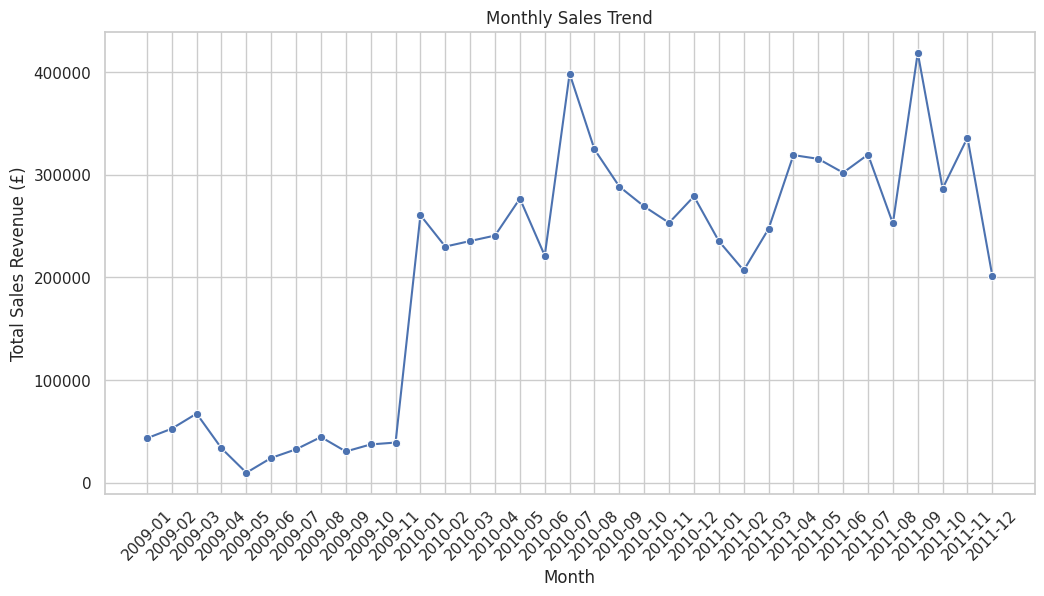

In [86]:
# Year-Month column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by Year-Month and sum TotalPrice
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)  # Convert YearMonth to string for plotting

# Line chart Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue (£)")
plt.xticks(rotation=45)
plt.show()


# Temporal Analysis – February & April Drops Check

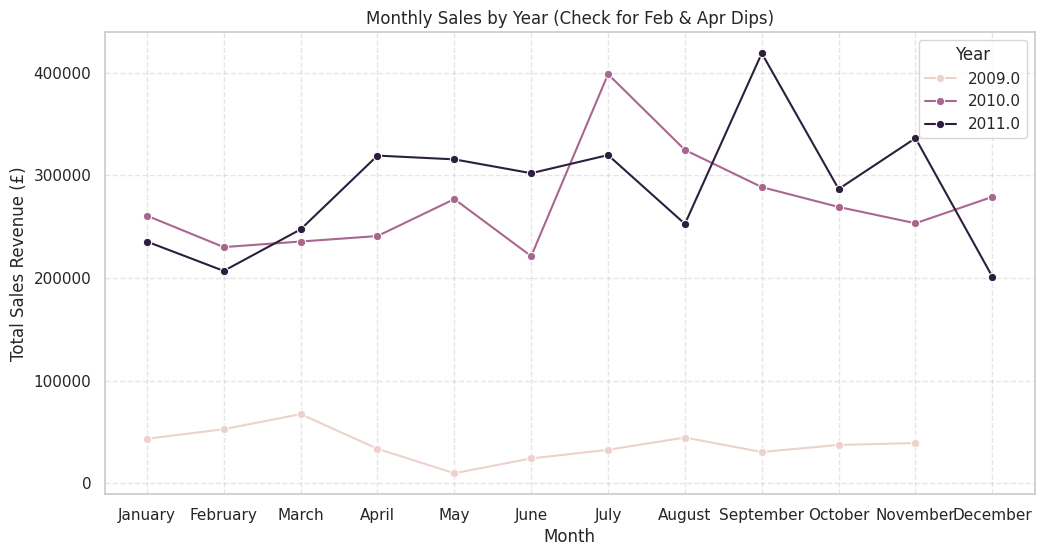

February Mean Sales: 163228.31
April Mean Sales: 197887.25333333333
Overall Mean Sales: 203882.48628571432
February consistent dip? False
April consistent dip? False


In [87]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year and Month from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['MonthName'] = df['InvoiceDate'].dt.strftime('%B')

# Group by Year and MonthName to get total sales
monthly_sales_yearly = df.groupby(['Year', 'MonthName'])['TotalPrice'].sum().reset_index()

# Reorder the months for better visualization
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
monthly_sales_yearly['MonthName'] = pd.Categorical(monthly_sales_yearly['MonthName'], 
                                                   categories=month_order, 
                                                   ordered=True)
monthly_sales_yearly = monthly_sales_yearly.sort_values(['Year', 'MonthName'])

# Plotting the monthly sales by year
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales_yearly, x='MonthName', y='TotalPrice', hue='Year', marker='o')
plt.title("Monthly Sales by Year (Check for Feb & Apr Dips)")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue (£)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# February data
feb_sales = monthly_sales_yearly[monthly_sales_yearly['MonthName'] == "February"]['TotalPrice']
# April data
apr_sales = monthly_sales_yearly[monthly_sales_yearly['MonthName'] == "April"]['TotalPrice']

# Mean & std check
feb_mean = feb_sales.mean()
apr_mean = apr_sales.mean()
overall_mean = monthly_sales_yearly['TotalPrice'].mean()

print(f"February Mean Sales: {feb_mean}")
print(f"April Mean Sales: {apr_mean}")
print(f"Overall Mean Sales: {overall_mean}")

# Check pattern: True if all years' Feb sales < overall mean
if hasattr(feb_sales, 'empty') and feb_sales.empty:
    feb_pattern = False
else:
    feb_pattern = bool((feb_sales < overall_mean).all())

if hasattr(apr_sales, 'empty') and apr_sales.empty:
    apr_pattern = False
else:
    apr_pattern = bool((apr_sales < overall_mean).all())

print(f"February consistent dip? {feb_pattern}")
print(f"April consistent dip? {apr_pattern}")

# Temporal Analysis – Day & Hour Pattern

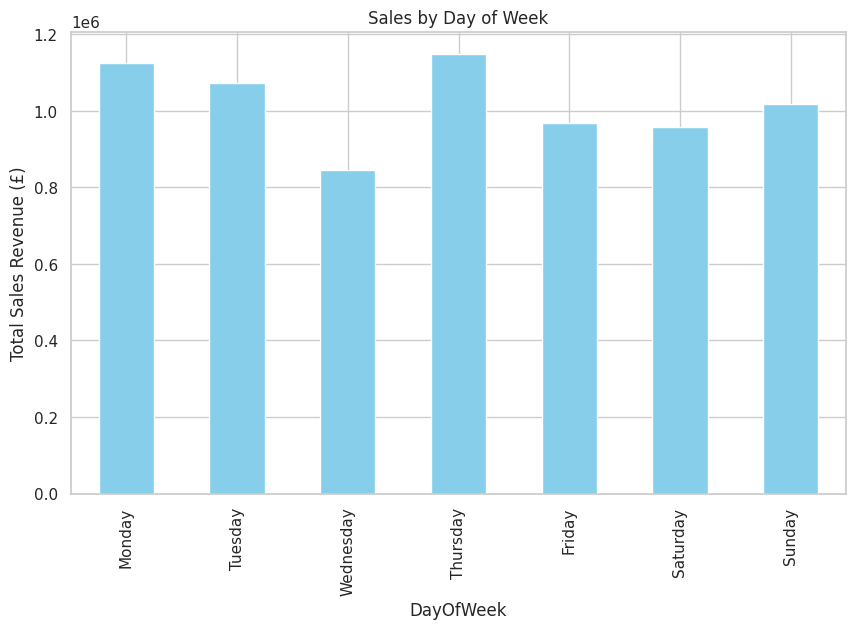

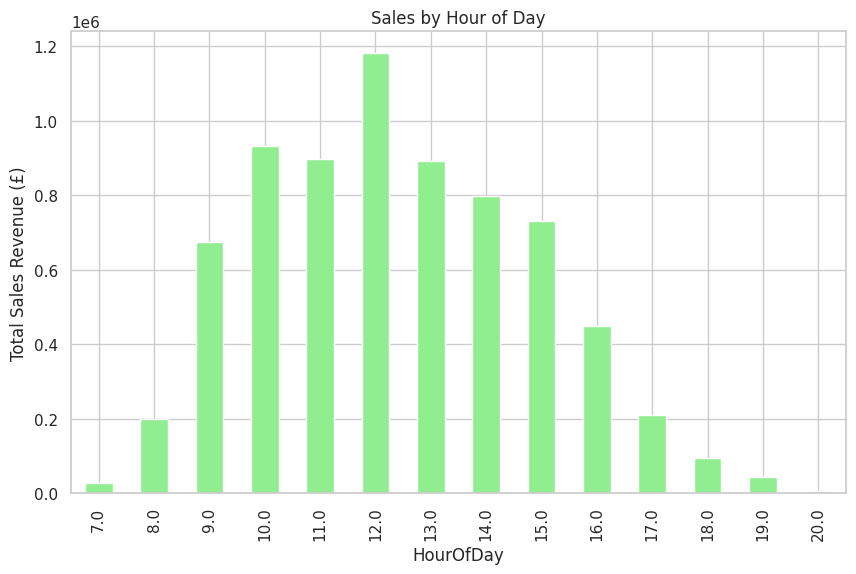

In [88]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Sales by Day
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Bar chart – Day
sales_by_day.plot(kind='bar', color='skyblue')
plt.title("Sales by Day of Week")
plt.ylabel("Total Sales Revenue (£)")
plt.show()

# Sales by Hour
sales_by_hour = df.groupby('HourOfDay')['TotalPrice'].sum()
sales_by_hour.plot(kind='bar', color='lightgreen')
plt.title("Sales by Hour of Day")
plt.ylabel("Total Sales Revenue (£)")
plt.show()


# Geographic Analysis – Top 10 Countries

/tmp/ipykernel_5583/162923314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=top_10_countries, palette="viridis")


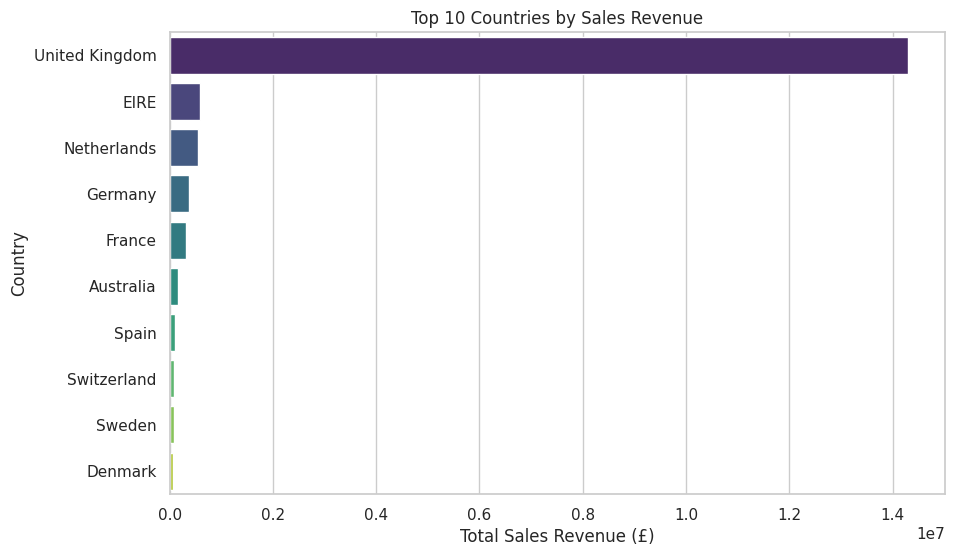

In [89]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Top 10
top_10_countries = country_sales.head(10)

# Plot
sns.barplot(x='TotalPrice', y='Country', data=top_10_countries, palette="viridis")
plt.title("Top 10 Countries by Sales Revenue")
plt.xlabel("Total Sales Revenue (£)")
plt.ylabel("Country")
plt.show()



# Geographic Analysis – UK vs Other Countries

In [90]:
uk_revenue = df[df['Country'] == 'United Kingdom']['TotalPrice'].sum()
total_revenue = df['TotalPrice'].sum()
uk_percentage = (uk_revenue / total_revenue) * 100
print(f"UK Revenue %: {uk_percentage:.2f}%")


UK Revenue %: 83.67%


# DayOfWeek and HourOfDay bar charts

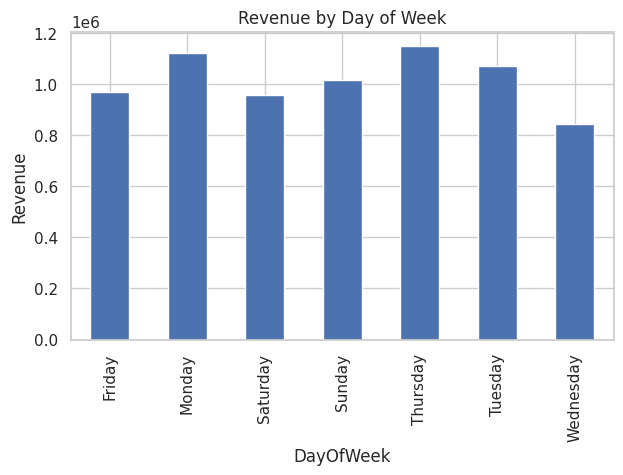

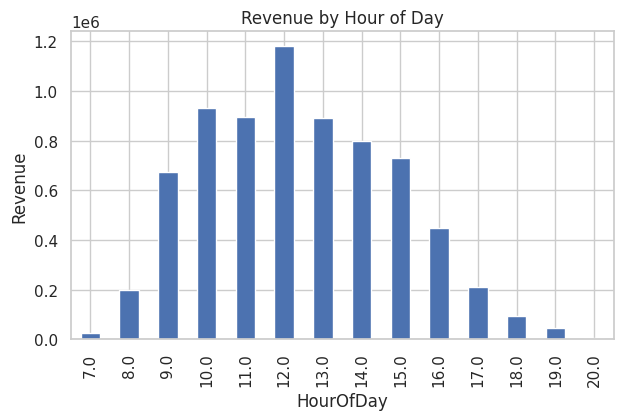

In [91]:
import matplotlib.pyplot as plt

# Revenue by DayOfWeek
day_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()
day_sales.plot(kind='bar', figsize=(7,4), title="Revenue by Day of Week")
plt.ylabel("Revenue")
plt.show()

# Revenue by HourOfDay
hour_sales = df.groupby('HourOfDay')['TotalPrice'].sum()
hour_sales.plot(kind='bar', figsize=(7,4), title="Revenue by Hour of Day")
plt.ylabel("Revenue")
plt.show()


# Product Performance Analysis

In [92]:
# Top 10 by Quantity Sold
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top 10 by Revenue
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("Top 10 by Quantity Sold:\n", top_quantity)
print("\nTop 10 by Revenue:\n", top_revenue)


Top 10 by Quantity Sold:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64

Top 10 by Revenue:
 Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
JUMBO BAG RED RETROSPOT               134307.44
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
CHILLI LIGHTS                          69084.30
JUMBO BAG STRAWBER

# 3.3 Phase 3: Advanced Analytics - RFM Customer Segmentation

In [93]:
import pandas as pd
import numpy as np

# Use the already-loaded `df` (from earlier EDA). If not present, load robustly.
try:
    df
except NameError:
    df = pd.read_csv('../data/cleaned-dataset.csv', low_memory=False)

# Ensure InvoiceDate is datetime
if df['InvoiceDate'].dtype == object or not np.issubdtype(df['InvoiceDate'].dtype, np.datetime64):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)

# Ensure TotalPrice exists
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0) * pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# Snapshot date = 1 day after last InvoiceDate
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot date: {snapshot_date}")

# Recency
recency_df = df.groupby('Customer ID').agg(Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days)).reset_index()

# Frequency (number of unique invoices)
frequency_df = df.groupby('Customer ID').agg(Frequency=('Invoice', 'nunique')).reset_index()

# Monetary (total spent)
monetary_df = df.groupby('Customer ID').agg(Monetary=('TotalPrice', 'sum')).reset_index()

# Merge
rfm_df = recency_df.merge(frequency_df, on='Customer ID').merge(monetary_df, on='Customer ID')

# Add average order value and average order quantity to help classify wholesalers
# avg_order_value = Monetary / Frequency
rfm_df['AvgOrderValue'] = rfm_df['Monetary'] / rfm_df['Frequency']

# average quantity per invoice per customer
invoice_qty = df.groupby(['Customer ID', 'Invoice']).agg(InvoiceQty=('Quantity', 'sum')).reset_index()
avg_qty = invoice_qty.groupby('Customer ID').agg(AvgOrderQty=('InvoiceQty', 'mean')).reset_index()
rfm_df = rfm_df.merge(avg_qty, on='Customer ID', how='left')

# RFM scoring using quintiles. Use rank for frequency to reduce qcut issues on identical values.
# Handle small number of customers by using qcut with duplicates dropped when necessary.
r_labels = [5,4,3,2,1]
f_labels = [1,2,3,4,5]
m_labels = [1,2,3,4,5]

try:
    rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=r_labels)
    rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=f_labels)
    rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=m_labels)
except ValueError:
    # fallback when there are too few unique values
    rfm_df['R_Score'] = pd.cut(rfm_df['Recency'], bins=5, labels=r_labels)
    rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'].rank(method='first'), bins=5, labels=f_labels)
    rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'], bins=5, labels=m_labels)

# Convert to int (coerce if NaN)
rfm_df['R_Score'] = pd.to_numeric(rfm_df['R_Score'], errors='coerce').fillna(1).astype(int)
rfm_df['F_Score'] = pd.to_numeric(rfm_df['F_Score'], errors='coerce').fillna(1).astype(int)
rfm_df['M_Score'] = pd.to_numeric(rfm_df['M_Score'], errors='coerce').fillna(1).astype(int)

# RFM segment code and description
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def map_rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    if f >= 4 and r >= 3:
        return 'Loyal Customers'
    if r >= 4 and f <= 2:
        return 'Recent Low-Frequency'
    if r <= 2 and f <= 2:
        return 'Hibernating'
    if r <= 2 and f >= 3:
        return 'At-Risk Customers'
    return 'Potential Loyalists'

rfm_df['RFM_Description'] = rfm_df.apply(map_rfm_segment, axis=1)

# Classify Wholesaler vs Retail based on simple heuristics
# Thresholds can be tuned; these are initial suggestions per project spec
wholesale_qty_threshold = 20  # avg qty per order
wholesale_value_threshold = 200.0  # avg order value

rfm_df['CustomerType'] = np.where((rfm_df['AvgOrderQty'] > wholesale_qty_threshold) | (rfm_df['AvgOrderValue'] > wholesale_value_threshold), 'Wholesaler', 'Retail')

# Summary comparisons
summary = rfm_df.groupby('CustomerType').agg(
    Customers=('Customer ID', 'nunique'),
    AvgFrequency=('Frequency', 'mean'),
    AvgMonetary=('Monetary', 'mean'),
    AvgOrderQty=('AvgOrderQty', 'mean'),
    AvgOrderValue=('AvgOrderValue', 'mean')
).reset_index()

print('\nCustomer type summary:')
print(summary)

# Save RFM segments
rfm_df.to_csv('../data/rfm_segments.csv', index=False)
print('\nSaved RFM segments to ../data/rfm_segments.csv')


Snapshot date: 2011-12-11 17:19:00

Customer type summary:
  CustomerType  Customers  AvgFrequency  AvgMonetary  AvgOrderQty  \
0       Retail        125      2.720000   140.627840    11.399038   
1   Wholesaler       5728      6.332577  2979.138843   256.747940   

   AvgOrderValue  
0      61.894360  
1     388.211929  

Saved RFM segments to ../data/rfm_segments.csv


# Map RFM scores to descriptive segments

In [94]:
# Define segment mapping
def rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 4:
        return 'Loyal Customers'
    elif r >= 4 and f <= 2:
        return 'New Customers'
    elif r <= 2 and f >= 3:
        return 'At-Risk Customers'
    else:
        return 'Hibernating'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)
rfm_df['Segment'].value_counts()


Segment
Hibernating          3024
At-Risk Customers    1376
Champions            1093
New Customers         227
Loyal Customers       133
Name: count, dtype: int64

# 3.4 Data Enrichment (API) - example: get country ISO codes using REST Countries API

In [95]:
import requests
import time

countries = df['Country'].dropna().unique().tolist()
country_rows = []
for country in countries:
    try:
        resp = requests.get(f'https://restcountries.com/v3.1/name/{country}?fullText=true', timeout=5)
        if resp.status_code == 200:
            data = resp.json()
            if isinstance(data, list) and len(data) > 0:
                c = data[0]
                iso2 = c.get('cca2')
                iso3 = c.get('cca3')
                country_rows.append({'Country': country, 'ISO2': iso2, 'ISO3': iso3})
        else:
            country_rows.append({'Country': country, 'ISO2': None, 'ISO3': None})
    except Exception:
        country_rows.append({'Country': country, 'ISO2': None, 'ISO3': None})
    time.sleep(0.15)

country_codes = pd.DataFrame(country_rows)
country_codes.to_csv('../data/country_codes_enrichment.csv', index=False)
print('\nSaved country enrichment to ../data/country_codes_enrichment.csv')

# Merge example (non-destructive):
# df = df.merge(country_codes, on='Country', how='left')



Saved country enrichment to ../data/country_codes_enrichment.csv


# Investigate wholesaler hypothesis

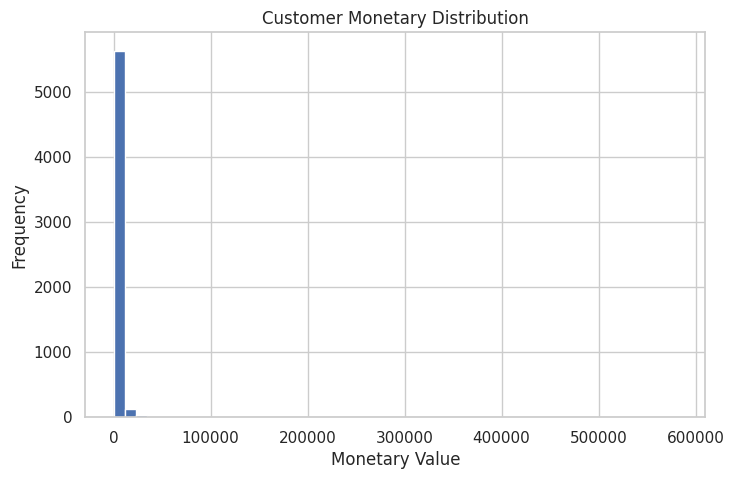

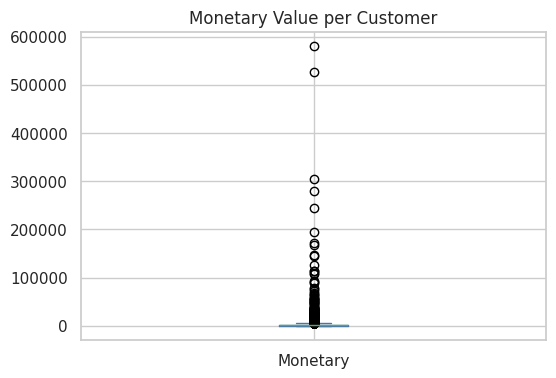

In [96]:
# Distribution of Monetary value per customer
rfm_df['Monetary'].plot(kind='hist', bins=50, figsize=(8,5), title="Customer Monetary Distribution")
plt.xlabel("Monetary Value")
plt.show()

rfm_df['Monetary'].plot(kind='box', figsize=(6,4), title="Monetary Value per Customer")
plt.show()


# Currency conversion with API + add USD/EUR columns

In [100]:
import requests

# Use a free API that doesn't require authentication
url = "https://api.fxratesapi.com/latest?base=GBP&currencies=USD,EUR"

try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    if 'rates' in data:
        gbp_to_usd = data['rates']['USD']
        gbp_to_eur = data['rates']['EUR']
        print(f"Live rates - GBP to USD: {gbp_to_usd}, GBP to EUR: {gbp_to_eur}")
    else:
        # Fallback rates
        gbp_to_usd = 1.27
        gbp_to_eur = 1.17
        print("Using fallback rates")

except requests.RequestException as e:
    print(f"API request failed: {e}")
    # Fallback rates
    gbp_to_usd = 1.27
    gbp_to_eur = 1.17
    print("Using fallback rates")

# Apply currency conversion
df['TotalPrice_USD'] = df['TotalPrice'] * gbp_to_usd
df['TotalPrice_EUR'] = df['TotalPrice'] * gbp_to_eur

# Display results
print(df[['Invoice', 'TotalPrice', 'TotalPrice_USD', 'TotalPrice_EUR']].head(100))

Live rates - GBP to USD: 1.34921797, GBP to EUR: 1.153622
    Invoice  TotalPrice  TotalPrice_USD  TotalPrice_EUR
0    489434       83.40      112.524779       96.212075
1    489434       81.00      109.286656       93.443382
2    489434       81.00      109.286656       93.443382
3    489434      100.80      136.001171      116.285098
4    489434       30.00       40.476539       34.608660
..      ...         ...             ...             ...
95   489442       13.50       18.214443       15.573897
96   489442       14.85       20.035887       17.131287
97   489442       19.80       26.714516       22.841716
98   489442       15.00       20.238270       17.304330
99   489442       17.70       23.881158       20.419109

[100 rows x 4 columns]
